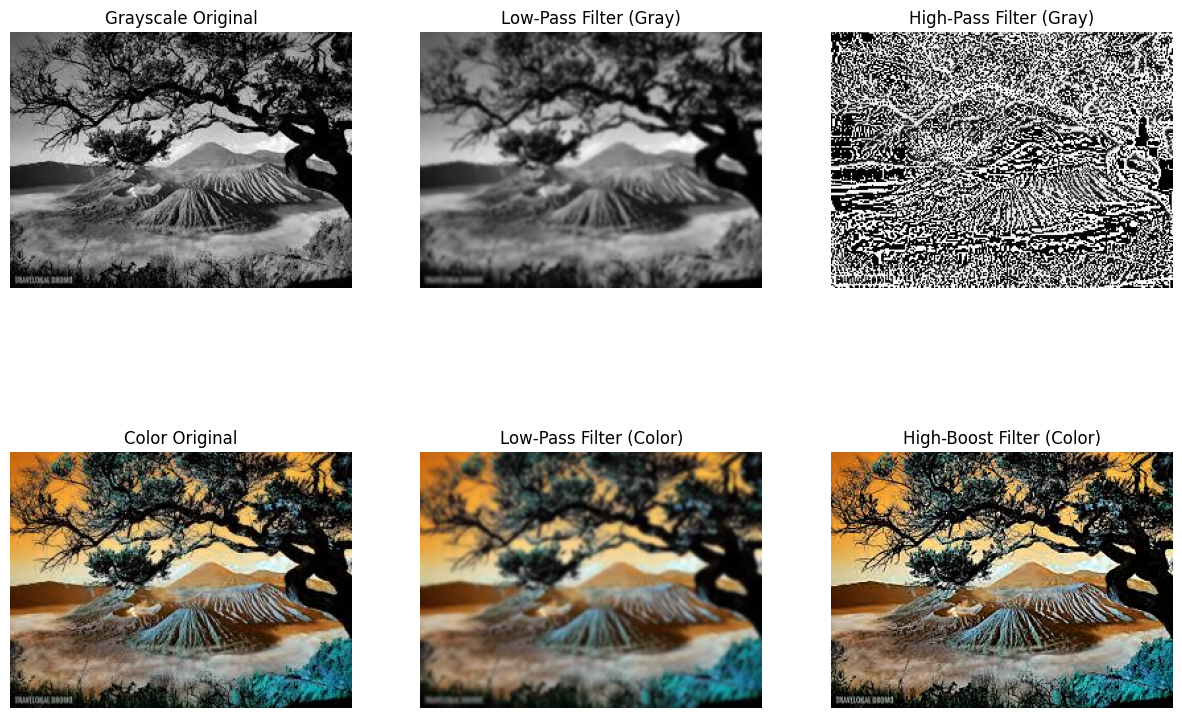

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan citra
def show_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Membaca citra
image_gray = cv2.imread('/content/pemandangan.jpeg', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('/content/pemandangan copy.jpeg')

# Filter Low-Pass (Gaussian Blur)
low_pass_gray = cv2.GaussianBlur(image_gray, (5, 5), 0)
low_pass_color = cv2.GaussianBlur(image_color, (5, 5), 0)

# Filter High-Pass
high_pass_gray = image_gray - cv2.GaussianBlur(image_gray, (5, 5), 0)
high_pass_color = image_color - cv2.GaussianBlur(image_color, (5, 5), 0)

# Filter High-Boost
high_boost_gray = cv2.addWeighted(image_gray, 1.5, low_pass_gray, -0.5, 0)
high_boost_color = cv2.addWeighted(image_color, 1.5, low_pass_color, -0.5, 0)

# Menampilkan hasil
show_images(
    [image_gray, low_pass_gray, high_pass_gray,
     image_color, low_pass_color, high_boost_color],
    ['Grayscale Original', 'Low-Pass Filter (Gray)', 'High-Pass Filter (Gray)',
     'Color Original', 'Low-Pass Filter (Color)', 'High-Boost Filter (Color)']
)